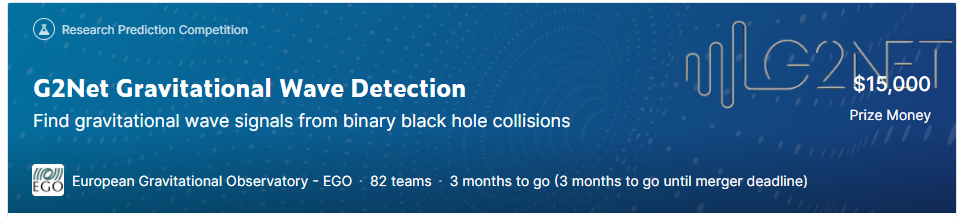

September 22, 2021 - Entry deadline. You must accept the competition rules before this date in order to compete.<br>
September 29, 2021 - Final submission deadline.

> 🔎チームワークが夢をかなえると言われています。これは、2015年に衝突した連星ブラックホールからの信号である重力波（GW）の画期的な発見には当てはまりませんでした。これには、物理​​学、数学、情報科学、コンピューティングの専門家の協力が必要でした。 GW信号により、研究者たちは、巨大な恒星起源のブラックホールの新しい集団を観察し、中性子星合体の謎を解き明かし、宇宙の膨張を測定するようになりました。これらの信号は時空の構造における想像を絶する小さな波紋であり、GW検出器のグローバルネットワークは地球上で最も感度の高い機器の一部ですが、信号は検出器のノイズに埋もれています。 GWデータの分析とこれらの信号の検出は、ますます感度が高くなるGW検出器の成長するグローバルネットワークにとって重要な使命です。データ分析とノイズ特性評価におけるこれらの課題は、データサイエンスの助けを借りて解決することができます。
> 
> GWの発見に対する多分野にわたるアプローチと同様に、GWの研究をさらに進めるには、追加の専門知識が必要になります。特に、社会科学と自然科学は、機械学習、深層学習、分類問題、データマイニング、視覚化に関心を持っており、複雑で大規模なデータセットを効率的に処理するための新しい技術とアルゴリズムを開発しています。計算能力の向上とデータの迅速な分析のための革新的な技術の開発は、GW天文学の刺激的な新しい分野に不可欠です。潜在的な結果には、GW信号に対する感度の向上、次世代検出器の制御およびフィードバックシステムへの適用、ノイズ除去、データ調整ツール、および信号の特性評価が含まれる場合があります。
> 
> 💡G2Netは、重力波、地球物理学、機械学習のネットワークです。 G2Netは、研究およびイノベーションネットワークの資金提供機関であるCOST（European Cooperation in Science and Technology）からのアクションを通じて、科学者の幅広いネットワークを構築することを目指しています。これらの科学者は、GW物理学、地球物理学、計算科学、ロボット工学の4つの異なる専門分野から、GW検出器のデータ分析とノイズ特性評価における課題に取り組むという共通の目標に合意しました。
> 
> このコンテストでは、ブラックホール連星の合併によるGW信号の検出を目指します。具体的には、地球ベースの検出器のネットワークからシミュレートされたGW時系列データを分析するためのモデルを構築します。

> 🔦このコンペテ[ィションでは、3つの重力波干渉計（LIGOハンフォード、LIGOリビングストン、およびバーゴ）のネットワークからのシミュレートされた重力波測定値を含む時系列データのトレーニングセットが提供されます。各時系列には、検出器ノイズまたは検出器ノイズのいずれかと、シミュレートされた重力波信号が含まれます。タスクは、信号がデータに存在するときを識別することです（target = 1）。
> 
> バイナリブラックホール波形の正確な形式を決定するパラメータは、質量、空の位置、距離、ブラックホールスピン、バイナリ配向角、重力波分極、到着時間、および合体時の位相（マージ）です。これらのパラメーター（合計15）は、天体物理学的に動機付けられた事前分布に従ってランダム化され、データに存在するシミュレートされた信号を生成するために使用されますが、競争データの一部として提供されません。
> 
> 各データサンプル（npyファイル）には3つの時系列（各検出器に1つ）が含まれ、それぞれが2秒にまたがり、2,048Hzでサンプリングされます。
> 
> 統合された信号対雑音比（SNR）は、古典的に、信号がどの程度検出可能であるかを示す最も有益な尺度であり、この統合されたSNRが約8を超える場合の検出可能性の一般的なレベルです。これは、瞬間的なSNR（信号がノイズを超えて上昇する要因）と混同しないでください。ほとんどすべての場合（最初の重力波検出GW150914とは異なり）、これらの信号は時系列で目で見ることができません。

In [ ]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/competiongoal/archive/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<div class="alert simple-alert"><div class="alert simple-alert"><font color="black">
<b>Competition Goal</b>: detect GW <i>(Gravitational Wave)</i>このコンテストでは、ブラックホール連星の合併によるGW信号の検出を目指します
</div>

😅なんてことだ。そんなん可能なんですか？


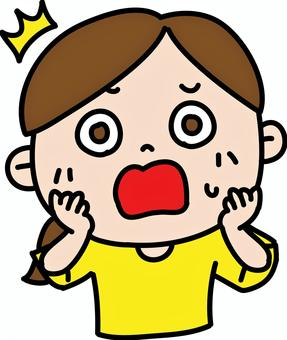

### 😁よくわからないから中身をみていこう

In [ ]:
!pip install -q nnAudio
!pip install timm

In [ ]:
import sys
sys.path.append('../input/pytorch-image-models/pytorch-image-models-master')

import os
import math
import time
import random
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

import timm

from torch.cuda.amp import autocast, GradScaler

from nnAudio.Spectrogram import CQT1992v2

import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from pathlib import Path
import pandas as pd
import glob
import numpy as np
import matplotlib as mpl
import seaborn as sns
import random
import joblib
from tqdm import tqdm_notebook as tqdm
import librosa
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# データ作成

In [ ]:
#list = glob.glob('./data/*.csv')
#data = pd.read_csv(list[0])
#for i in tqdm(range(1,len(list))):
#    data = pd.concat([data,pd.read_csv(list[i])])
#data.to_csv('g2net_train.csv')

In [ ]:
#stop

## 📌training_labels.csv-関連する信号に重力波が含まれているかどうかの目標値

In [ ]:
pd.read_csv('../input/g2net-gravitational-wave-detection/training_labels.csv')

### ファイル構成はこんな感じになっている。

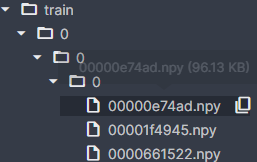

## 📌train /-トレーニングセットファイル、観測ごとに1つのnpyファイル。 


### target=1でブラックホールあるパターン

In [ ]:
input = np.load('../input/g2net-gravitational-wave-detection/train/0/0/0/00000e74ad.npy')
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].hist(pd.DataFrame(input[0]))
ax[0].set_title("channel 0")
ax[1].hist(pd.DataFrame(input[1]))
ax[1].set_title("channel 1")
ax[2].hist(pd.DataFrame(input[2]))
ax[2].set_title("channel 2")

### target=0でブラックホールないパターン

In [ ]:
input = np.load('../input/g2net-gravitational-wave-detection/train/0/0/0/00001f4945.npy')
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].hist(pd.DataFrame(input[0]))
ax[0].set_title("channel 0")
ax[1].hist(pd.DataFrame(input[1]))
ax[0].set_title("channel 1")
ax[2].hist(pd.DataFrame(input[2]))
ax[0].set_title("channel 2")

### target=1でブラックホールあるパターン

In [ ]:
input = np.load('../input/g2net-gravitational-wave-detection/train/0/0/0/00000e74ad.npy')
sns.distplot(pd.DataFrame(input[0]))
sns.distplot(pd.DataFrame(input[1]))
sns.distplot(pd.DataFrame(input[2]))

In [ ]:
input = np.load('../input/g2net-gravitational-wave-detection/train/0/0/0/0000a38978.npy')
sns.distplot(pd.DataFrame(input[0]))
sns.distplot(pd.DataFrame(input[1]))
sns.distplot(pd.DataFrame(input[2]))

### target=0でブラックホールないパターン

In [ ]:
input = np.load('../input/g2net-gravitational-wave-detection/train/0/0/0/00001f4945.npy')
sns.distplot(pd.DataFrame(input[0]))
sns.distplot(pd.DataFrame(input[1]))
sns.distplot(pd.DataFrame(input[2]))

In [ ]:
input = np.load('../input/g2net-gravitational-wave-detection/train/0/0/0/0000661522.npy')
sns.distplot(pd.DataFrame(input[0]))
sns.distplot(pd.DataFrame(input[1]))
sns.distplot(pd.DataFrame(input[2]))

### なにか共通して違うというわけではなさそう

### なにを予測するのか

In [ ]:
pd.read_csv('../input/g2net-gravitational-wave-detection/sample_submission.csv')

id 0は、テストフォルダの１個目の名前ですね。

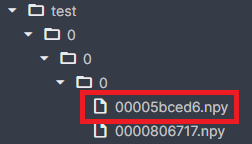

提出物は、予測された確率と観察されたターゲットの間のROC曲線の下の領域で評価されます。とあります。ターゲットはこれを意識する必要があるようです。<br>


In [ ]:
#list = glob.glob('../input/g2net-gravitational-wave-detection/train/*/*/*/*')
#len(list)

In [ ]:
#list = sorted(list)
#list[:10]

https://www.kaggle.com/yasufuminakama/g2net-efficientnet-b7-baseline-training

In [ ]:
train = pd.read_csv('../input/g2net-gravitational-wave-detection/training_labels.csv')
test = pd.read_csv('../input/g2net-gravitational-wave-detection/sample_submission.csv')

def get_train_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/train/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

def get_test_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/test/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

train['file_path'] = train['id'].apply(get_train_file_path)
test['file_path'] = test['id'].apply(get_test_file_path)
print(train.shape)
display(train.head())
display(test.head())

### trainデータを読んでみる =>メモリ不足で死んでしまいます。
joblibを使って高速化

In [ ]:
%%capture
'''
def func(i):
    input = np.load(i[1][2])
    return input
result = joblib.Parallel(n_jobs=-1)(joblib.delayed(func)(i) for i in tqdm(train.iterrows()))
'''

㊙🔰🗑⬛🟥🟨🟩